ライブラリの読み込み

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

学習データ (wine) の読み込みと概要の表示

In [2]:
wine = load_wine()
print(wine.DESCR)
X = wine.data
y = wine.target

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

学習（決定木で識別を行う識別器の作成）

In [8]:
clf = DecisionTreeClassifier()
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


学習（交差確認法による性能評価）

In [9]:
scores = cross_val_score(clf, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100,
                                       scores.std() * 100))

88.91 +/- 7.00 %


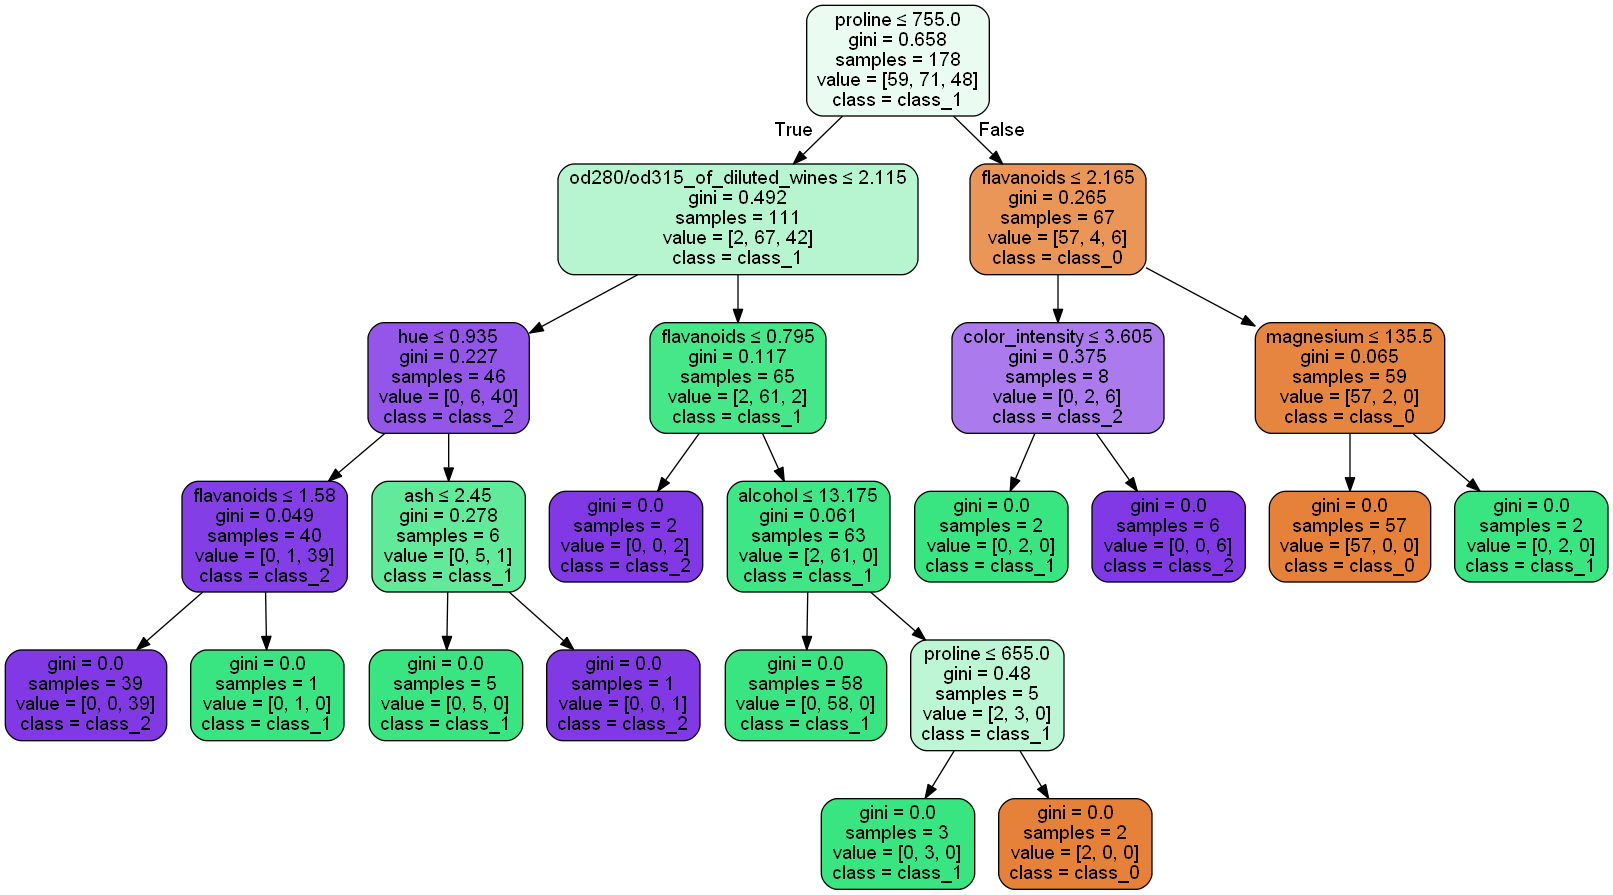

In [10]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
clf.fit(X, y)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
clf2 = GaussianNB()
print(clf2)

GaussianNB(priors=None)


In [12]:
scores = cross_val_score(clf2, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100,
                                       scores.std() * 100))

96.17 +/- 4.24 %


In [13]:
clf3 = LogisticRegression()
print(clf3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [14]:
scores = cross_val_score(clf3, X, y, cv=10)
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100,
                                       scores.std() * 100))

95.64 +/- 5.25 %
